## Chapter 8

In [62]:
import sys
sys.path.append("..")
from importlib import reload

In [63]:
import Ch6.utilities as ch6_utils
reload(ch6_utils)

<module 'Ch6.utilities' from '../Ch6/utilities.py'>

In [64]:
import Ch7.utilities as ch7_utils
reload(ch7_utils)

<module 'Ch7.utilities' from '../Ch7/utilities.py'>

In [65]:
import Ch8.utilities as ch8_utils
reload(ch8_utils)

<module 'Ch8.utilities' from '../Ch8/utilities.py'>

In [66]:
import numpy as np
from sympy import *
init_printing(use_latex='mathjax')
import control
import matplotlib.pyplot as plt

### Problem 8.1

It is given that

\begin{eqnarray}
\Phi_c (s) \triangleq [ \Phi^{-1}(s) + BG ]^{-1}.
\end{eqnarray}

Do algebraic manipulations to get rid of the $\Phi^{-1}$ on the RHS:

\begin{eqnarray}
[ \Phi^{-1}(s) + BG ] \Phi_c (s) &=& I \\
\Phi(s) [ \Phi^{-1}(s) + BG ] \Phi_c(s) &=& \Phi(s) \\
[ I + \Phi(s) BG] \Phi_c(s) &=& \Phi(s) \\
\Phi_c(s) &=& [ I + \Phi(s) BG]^{-1} \Phi(s).
\end{eqnarray}

Now, it remains to show that:

\begin{eqnarray}
\Phi(s) - \Phi(s) B [ \Phi(s) + G \Phi(s) B]^{-1} G \Phi(s) &=& [ I + \Phi(s) BG]^{-1} \Phi(s) \\
\implies I - \Phi(s) B [ \Phi(s) + G \Phi(s) B]^{-1} G &=& [ I + \Phi(s) BG]^{-1}
\end{eqnarray}

Using the hint about block-diagram manipulations, it can be shown that $\Phi(s) B [ \Phi(s) + G \Phi(s) B]^{-1} = [ \Phi(s) + \Phi(s) B G]^{-1} \Phi(s) B$:

Now, plug in the above to the previous relation:
\begin{eqnarray}
I - [\Phi(s) + \Phi(s) B G]^{-1} \Phi(s) B G &=& [ I + \Phi(s) BG]^{-1}
\end{eqnarray}

Left-multiply both sides by $I + \Phi(s) BG$:
\begin{eqnarray}
(I + \Phi(s) BG) \bigl ( I - [\Phi(s) + \Phi(s) B G]^{-1} \Phi(s) B G \bigr ) &=& I \\
(I + \Phi(s) BG) - \Phi(s) B G &=& I \\
I &=& I
\end{eqnarray}

So, through algebraic reductions, a tautology is reached.  Therefore, it is true that

\begin{eqnarray}
\Phi_c (s) \triangleq [ \Phi^{-1}(s) + BG ]^{-1} = \Phi(s) - \Phi(s) B [ \Phi(s) + G \Phi(s) B]^{-1} G \Phi(s)
\end{eqnarray}

### Problem 8.2

Transform the system of equations from $\mathbf{\hat x}$ to $\mathbf{\hat w}$, where $\mathbf{\hat x} = P \mathbf{\hat w}_1 + Q \mathbf{\hat w}_2$, and $\mathbf{w}_1 = C \mathbf{x}$ and $\mathbf{w}_2 = M \mathbf{x}$.

The feedback law $u = -G \mathbf{\hat x}$ becomes:
\begin{eqnarray}
u &=& -G (P \mathbf{\hat w}_1 + Q \mathbf{\hat w}_2) \\
&=& -G P \mathbf{\hat w}_1 - G Q \mathbf{\hat w}_2 \\
&\triangleq& -\bar G_1 \mathbf{\hat w}_1 -  \bar G_2 \mathbf{\hat w}_2.
\end{eqnarray}

The dynamics of the closed-loop transformed system is:
\begin{eqnarray}
\mathbf{\dot w} &=& \bar A \mathbf{w} + \bar B u \\
&=& \bar A \mathbf{w} - \bar B ( \bar G_1 \mathbf{\hat w}_1 + \bar G_2 \mathbf{\hat w}_2 ) 
\end{eqnarray}

Now, follow the steps leading up to Eqn. 8.27:  $\mathbf{e} = \mathbf{w} - \mathbf{\hat w} \implies \mathbf{\hat w} = \mathbf{w} - \mathbf{e}$:

\begin{eqnarray}
\mathbf{\dot w} &=& \bar A \mathbf{w} - \bar B \bigl [ \bar G_1 (\mathbf{w}_1 - \mathbf{e}_1) + \bar G_2 (\mathbf{w}_2 - \mathbf{e}_2) \bigr ] \\
&=& (\bar A - \bar B \bar G) \mathbf{w} + \bar B( \bar G_1 \mathbf{e}_1 + \bar G_2 \mathbf{e_2}).
\end{eqnarray}

The remainder of the derivation for the transformed system follows _exactly_ the same steps in deriving Eqn. 8.27:

\begin{eqnarray}
\mathbf{w}(s) &=& (sI - \mathbf{\bar A}_c)^{-1} \bar B \bar G_2 \mathbf{e}_2(s) + (sI - \mathbf{\bar A}_c)^{-1} \mathbf{w}(0) \\
\mathbf{e}_2 &=& (sI - \bar F)^{-1} \mathbf{e}_2(0) \\
\implies \mathbf{w}(s) &=& (sI - \mathbf{\bar A}_c)^{-1} \bar B \bar G_2 (sI - \bar F)^{-1} \mathbf{e}_2(0) + (sI - \mathbf{\bar A}_c)^{-1} \mathbf{w}(0) \\
&=& \frac{\text{adj}(sI - \mathbf{\bar A}_c) \bar B \bar G_2 \text{adj}(sI - \bar F)}{|sI - \mathbf{\bar A}_c| |sI - \bar F|} \mathbf{e}_2(0) + (sI - \mathbf{\bar A}_c)^{-1} \mathbf{w}(0)
\end{eqnarray}

The characteristic equation is then $|sI - \mathbf{\bar A}_c||sI - \bar F| = 0$, with

\begin{eqnarray}
\bar A &=& \begin{pmatrix}
CAP & CAQ \\
MAP & MAQ
\end{pmatrix}\\
\bar B &=& \begin{pmatrix}
CB \\
MB
\end{pmatrix} \\
\bar F &=& (M - LC)AQ \\
\mathbf{\bar A}_c &=& \bar A - \bar B \bar G,
\end{eqnarray}

with $\bar G \triangleq [\bar G_1 | \bar G_2]$.

### Problem 8.3

#### a)
The reduced order observer is defined by the matrices $F, \bar {\bar G}, H$:
\begin{eqnarray}
F &\triangleq& A_{uu} - L C_a A_{au} = -\alpha - L \times 1 \times 1 = -\alpha - L \\
\bar {\bar G} &\triangleq& (A_{ua} - L C_a A_{aa}) C_a^{-1} = 0 - L \times 1 \times 0 \times 1 = 0 \\
H &\triangleq& B_u - L \times C_a \times B_a = \beta - L \times 1 \times 0 = \beta
\end{eqnarray}

The observability matrix for the available subsystem, $C_a$, is just unity ($=1$).

#### b)
The gains from example 8B are:
\begin{eqnarray}
G_1 &=& \frac{\bar a_2}{\beta} \\
G_2 &=& \frac{\bar a_1 - \alpha}{\beta}
\end{eqnarray}

The feedback law using these gains is:
\begin{eqnarray}
u &=& -G_1 \hat \theta - G_2 \hat \omega \\
&=& -G_1 y - G_2 (Ly + z),
\end{eqnarray}

The second equality above follows from the fact that $\theta$ is the measurement from which the reduced order observer for $\hat \omega$ is built.

Now, it remains to find the transfer function that takes measurement $y(s)$ to $z(s)$.  Plugging in the control found above into the equation for $z$, $\dot z = F z + \bar {\bar G} y + Hu$, leads to the closed-loop system:
\begin{eqnarray}
\dot z &=& (F - H G_2) z + (\bar {\bar G} - HG_1 C_a^{-1} - H G_2 L) y \\
&\equiv& \mathbf{F}_c z + \mathbf{\bar G} y 
\end{eqnarray}

which has transfer function representation (see Ch. 3):
\begin{eqnarray}
z(s) = (sI - \mathbf{F}_c)^{-1} \mathbf{\bar G} y(s)
\end{eqnarray}

The feedback law can then be written in the Laplace domain as:
\begin{eqnarray}
u(s) &=& -(G_1 + G_2 L + (sI - \mathbf{F}_c)^{-1} \mathbf{\bar G}) y(s)
\end{eqnarray}

Putting this in the form $u(s) = -D(s)y(s)$ gives the compensator:
\begin{eqnarray}
D(s) = G_1 + G_2 L + (sI - \mathbf{F}_c)^{-1} \mathbf{\bar G}.
\end{eqnarray}

#### c)

Example 8B gives $\bar a_1 = 4$ and $\bar a_2 = 8$.  Plugging these values into $D(s)$ found in the previous section gives:

In [7]:
# use sympy to do reduction
a1, a2, l, s = symbols('a1 a2 l s')
p = a2 + (a1 - 1)*l + ((a1 - 1)*(1-a1)*l - a2)/(s+l+a1)
pprint(simplify(p))
# the beta term cancels regardless of choice of L
a2 = 8.
a1 = 4.
q = (-a2 - l*(a1-1.)**2 + (a2 + l*(a1-1.))*(a1 + l + s)) / (s+l+a1)
pprint(simplify(q))

                2                                 
-a₂ - l⋅(a₁ - 1)  + (a₂ + l⋅(a₁ - 1))⋅(a₁ + l + s)
──────────────────────────────────────────────────
                    a₁ + l + s                    
-9.0⋅l + (3.0⋅l + 8.0)⋅(l + s + 4.0) - 8.0
──────────────────────────────────────────
               l + s + 4.0                


Use `sympy` reduction above:
\begin{eqnarray}
D(s) = \frac{(3L+8)s + 3L^2 + 3L + 32}{\beta (s + L + 4)}.
\end{eqnarray}

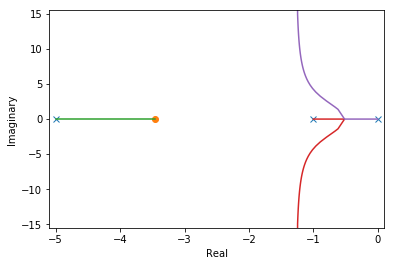

In [53]:
G = control.TransferFunction(np.array([1.]), np.array([1., 1., 0.]))
L = 1.0
num = np.array([3.*L+8., 3.*L**2 + 3.*L+32.])
den = np.array([1., L+4])
D = control.TransferFunction(num, den)
control.root_locus(D*G, PrintGain=False, Plot=True)
#_, _, _ = control.nyquist_plot(D*G, Plot=True, PrintGain=False)
plt.show()

For $L \ge 0$, the system has infinite gain margin.  As hinted at in Example 8B, this seems to indicate that a compensator derived with a reduced order observer can have simplified form and better performance characteristics.  Nyquist plots don't make much sense to me, but here it is because the problem asked for it.

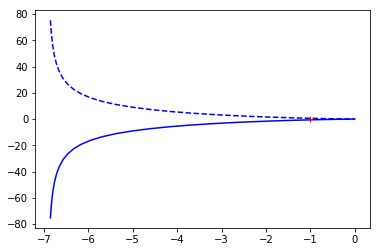

In [54]:
_, _, _ = control.nyquist_plot(D*G, Plot=True)
plt.show()

### Problem 8.4

#### a)
The gains from Problems 6.1 (regulator) and 7.2 (full-order observer) are:
\begin{eqnarray}
G &=& \begin{pmatrix}
-326.53061224, \ 
-226.32653061, \
-812.09061224, \
-242.32653061
\end{pmatrix}\\
K &=& \begin{pmatrix}
-11.935 \\
394.510 \\
-452.006 \\
-1993.619
\end{pmatrix}
\end{eqnarray}

The form of the compensator is $D(s) = G (sI - A + BG + KC)^{-1} K$:

In [67]:
A = np.array([[0., 1., 0., 0.], [0., -25., -0.98, 0.], [0., 0., 0., 1.], [0., 25., 10.78, 0.]]).astype('float')
B = np.array([[0.], [0.5], [0.], [-0.5]]).reshape((4,1)).astype('float')
C = np.array([[1., 0., 0., 0.]]).reshape((1, 4)).astype('float')
D = np.zeros((1, 1)).astype('float')
desiredPolesCtrl = np.array([-25., -4., np.complex(-2., 2.*np.sqrt(3)), np.complex(-2., -2.*np.sqrt(3))])
w0 = 5.
desiredPolesObsv = np.roots(np.array([1.0, 2.613*w0, (2.+np.sqrt(2))*w0**2, 2.613*w0**3, w0**4]))
tfD = ch8_utils.fullOrderCompensator(A, B, C, D, desiredPolesCtrl, desiredPolesObsv)
pprint('D(s) = {}'.format(tfD))
sysplant = control.StateSpace(A, B, C, D)
tfplant = control.ss2tf(sysplant)
pprint('H(s) = {}'.format(tfplant))

                        D(s) =                         
7.648e+05 s^3 + 2.153e+07 s^2 + 5.963e+07 s - 2.041e+05
-------------------------------------------------------
  s^4 + 21.07 s^3 + 232.7 s^2 - 3.807e+05 s - 1.197e+06
                  H(s) =                    
            0.5 s^2 + 2.012e-15 s - 4.9     
--------------------------------------------
s^4 + 25 s^3 - 10.78 s^2 - 245 s + 1.981e-14


The return difference has the desired form for $K=1$ (unity loop gain).

#### b)
The return difference $T(s) = 1 + K D(s) H(s)$ is the denominator of the closed-loop transfer function. As shown above, the zeros of $T(s)$ will be the poles of the closed-loop system.  We can find the range of K for which the closed-loop system is stable by the Hurwitz criteria (see Ch. 4), or just use the `zero` method of `python-control` to find some numeric range for $K$.

In [56]:
# T(s) = 1 + Kb*D(s)*H(s) (Kb != K from above!)
k = np.linspace(0.998, 1.002, 101)
kStable = ch8_utils.stabilityRange(tfD, tfplant, k)
if kStable is not None:
    print('{min} <= k <= {max} defines the range of stable gains.'.format(min=kStable[0], max=kStable[1]))
else:
    print('no stable gains were found in the range provided')

0.99972 <= k <= 1.001 defines the range of stable gains.


#### c)

The closed-loop compensator was shown to achieve the desired closed-loop poles, but with very slight gain margin.  This is not a good sign. Hopefully, the reduced order observer results in a simpler system and more robust system.

### Problem 8.5
#### a)

In [68]:
A = np.array([[0., 1., 0., 0.], [0., -25., -0.98, 0.], [0., 0., 0., 1.], [0., 25., 10.78, 0.]]).astype('float')
B = np.array([[0.], [0.5], [0.], [-0.5]]).reshape((4,1)).astype('float')
C = np.array([[1., 0., 0., 0.]]).reshape((1, 4)).astype('float')
D = np.zeros((1, 1)).astype('float')

### Controller ###
desiredPolesCtrl = np.array([-25., -4., np.complex(-2., 2.*np.sqrt(3)), np.complex(-2., -2.*np.sqrt(3))])
G = ch6_utils.bassGura(A, B, desiredPolesCtrl)
            
### Observer ###
desiredPolesObsv = np.roots(np.array([1.0, 2.*5., 2.*5.**2, 5.**3]))
Aaa = np.array(A[0, 0]).reshape((1, 1))
Aau = np.array(A[0, 1:]).reshape((1, 3))
Aua = np.array(A[1:, 0]).reshape((3, 1))
Auu = np.array(A[1:, 1:]).reshape((3, 3))
Ba = np.array(B[0]).reshape((1, 1))
Bu = np.array(B[1:]).reshape((3, 1))
Ca = np.array([[1]]).reshape((1, 1)).astype('float')
L, Gbb, H = ch7_utils.reducedOrderObserver(Aaa, Aau, Aua, Auu, Ba, Bu, Ca, desiredPolesObsv)

### Compensator ###
G1 = G[0, 0].reshape((1, 1))
G2 = G[0, 1:].reshape((1, 3))
F = Auu - L@Aau
Ar = F-H@G2
Br = Ar@L + Gbb - H@G1
Cr = G2
Dr = G1+G2@L
sysD = control.StateSpace(Ar, Br, Cr, Dr)
tfD = control.ss2tf(sysD)
pprint('D(s) = {}'.format(tfD))
sysplant = control.StateSpace(A, B, C, D)
tfplant = control.ss2tf(sysplant)
pprint('H(s) = {}'.format(tfplant))

                        D(s) =                         
1.049e+05 s^3 + 2.955e+06 s^2 + 8.202e+06 s - 4.082e+04
-------------------------------------------------------
              s^3 + 18 s^2 - 5.23e+04 s - 1.648e+05    
                  H(s) =                    
            0.5 s^2 + 2.012e-15 s - 4.9     
--------------------------------------------
s^4 + 25 s^3 - 10.78 s^2 - 245 s + 1.981e-14


The return difference has the desired form for $K=1$ (unity loop gain).

#### b)

In [58]:
# T(s) = 1 + Kb*D(s)*H(s) (Kb != K from above!)
k = np.linspace(0.998, 1.002, 101)
kStable = ch8_utils.stabilityRange(tfD, tfplant, k)
if kStable is not None:
    print('{min} <= k <= {max} defines the range of stable gains.'.format(min=kStable[0], max=kStable[1]))
else:
    print('no stable gains were found in the range provided')

0.99948 <= k <= 1.00112 defines the range of stable gains.


#### c)
The compensated system has slightly better stability margins and with lower order.  This would be preferable to the controller from the previous problem.

### Problem 8.6

#### a)
I'm not drawing any more block diagrams.  As for the compensator:

The gains found in Problem 6.8 were $G = [0, \ 6.5, \ 6.5]$, and for Problem 7.8 was $K = [42.5, \ 16.5, \ 2.]$.

In [69]:
R, _C = 2., 1.
A = np.array([[-3./(R*_C), 1./(R*_C), 0.],[1./(R*_C), -2./(R*_C), 1./(R*_C)], [0., 1./(R*_C), -3./(R*_C)]]).reshape((3, 3)).astype('float')
B = np.array([[2. / (R*_C)], [0.], [0.]]).reshape((3, 1)).astype('float')
C = np.array([[0., 0., 1.]]).reshape((1, 3)).astype('float')
D = np.zeros((1, 1)).astype('float')
desiredPolesCtrl = np.roots(np.array([1., 4., 8., 8.]))
w0 = 3.
desiredPolesObsv = np.roots(np.array([1.0, 2.*w0, 2.*w0**2, w0**3]))
tfD = ch8_utils.fullOrderCompensator(A, B, C, D, desiredPolesCtrl, desiredPolesObsv)
pprint('D(s) = {}'.format(tfD))
sysplant = control.StateSpace(A, B, C, D)
tfplant = control.ss2tf(sysplant)
pprint('H(s) = {}'.format(tfplant))

         D(s) =           
120.3 s^2 + 552.5 s + 624 
--------------------------
s^3 + 6 s^2 + 21.25 s + 40
         H(s) =           
                0.25      
--------------------------
s^3 + 4 s^2 + 4.75 s + 1.5


$0$ is not a zero of the return difference, so then it is not a pole of the closed-loop transfer function.  This means that the compensator does _not_ provide true integral control.

#### b)

_(omitted)_

#### c)

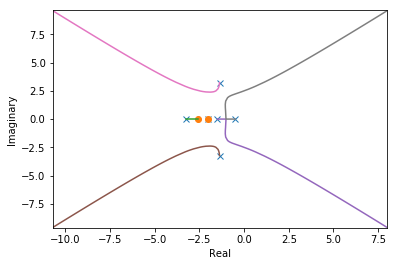

In [70]:
H = tfD*tfplant
control.root_locus(H, Plot=True, PrintGain=False)
plt.show()

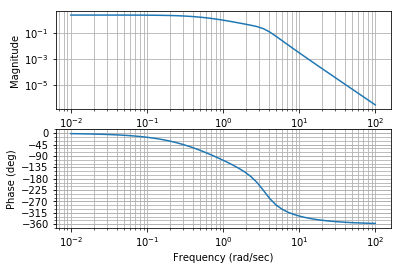

Gain margin (dB): 8.231445913407786
Phase margin (dB): 36.92108653472774


In [71]:
control.bode_plot(H)
plt.show()
gm, pm, _, _ = control.margin(H)
print('Gain margin (dB): {}'.format(control.mag2db(gm)))
print('Phase margin (dB): {}'.format(control.mag2db(pm)))

### Problem 8.7

#### a)

In [77]:
# with K, M, k, R, r = 40, 1, 2, 100, 0.02
A = np.array([[0, 0, 1, 0], [0, 0, 0, 1], [-40, 40, -100, 0], [40, -40, 0, -100]]).astype('float')
B = np.array([[0], [0], [1], [0]]).astype('float')
C = np.array([1, 0, 0, 0]).astype('float').reshape((1, 4))
D = np.zeros((1, 1)).astype('float')

## from Problem 6.3
closedLoopPoles = np.array([np.complex(-1., -1.), np.complex(-1., 1.), np.complex(-100., -100.), np.complex(-100., 100.)])
G = ch6_utils.bassGura(A, B, closedLoopPoles)

H = control.ss2tf(control.StateSpace(A, B, C, D))
N = control.zero(H)
poly1 = np.poly(N)

# place 2 remaining observer poles in a butterworth pattern order 2 -> z**2 + sqrt(2)*z + 1
# z = s/w0
w0 = 2
p2 = np.poly(np.roots([1., 1.414*w0, w0**2]))
p = np.polymul(poly1, p2)

K = ch7_utils.obsBassGura(A, C, np.roots(p))
pprint('K = ')
pprint(K)

K = 
[[-9.7172000e+01] 
 [ 1.8189894e-11] 
 [ 9.6812000e+03] 
 [ 4.0000000e+01]]


#### b) and c)

                         D(s) =                          
   -1.944e+06 s^3 - 9.991e+07 s^2 - 7.918e+07 s + 1.6e+05
---------------------------------------------------------
s^4 + 104.8 s^3 + 1.045e+04 s^2 + 9.934e+05 s + 3.973e+05
               H(s) =                 
                s^2 + 100 s + 40      
--------------------------------------
s^4 + 200 s^3 + 1.008e+04 s^2 + 8000 s
Gain margin (dB): 0.009760182356690496
Phase margin: -0.10731738183710604


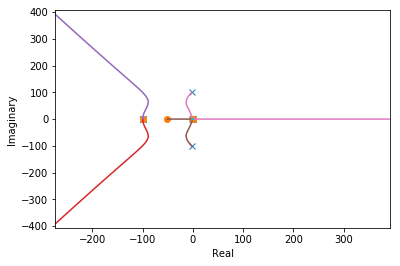

In [78]:
Abarc = A - B.dot(G) - K.dot(C)
sysD = control.StateSpace(Abarc, K, G, np.zeros((1, 1)))
tfD = control.ss2tf(sysD)
pprint('D(s) = {}'.format(tfD))
sysplant = control.StateSpace(A, B, C, np.zeros((1, 1)))
tfplant = control.ss2tf(sysplant)
pprint('H(s) = {}'.format(tfplant))

H = tfD*tfplant

gm, pm, _, _ = control.margin(H)
print('Gain margin (dB): {}'.format(control.mag2db(gm)))
print('Phase margin: {}'.format(pm))

control.root_locus(H, Plot=True, PrintGain=False)
plt.show()

The gain and phase margins here suck!  Maybe the design will be better in the next problem.

### Problem 8.8

#### a)

In [80]:
# with K, M, k, R, r = 40, 1, 2, 100, 0.02
A = np.array([[0, 0, 1, 0], [0, 0, 0, 1], [-40, 40, -100, 0], [40, -40, 0, -100]]).astype('float')
B = np.array([[0], [0], [1], [0]]).astype('float')
C = np.array([0, 1, 0, 0]).astype('float').reshape((1, 4))
D = np.zeros((1, 1)).astype('float')

## from Problem 6.3
closedLoopPoles = np.array([np.complex(-1., -1.), np.complex(-1., 1.), np.complex(-100., -100.), np.complex(-100., 100.)])
G = ch6_utils.bassGura(A, B, closedLoopPoles)

H = control.ss2tf(control.StateSpace(A, B, C, D))
N = control.zero(H)
poly1 = np.poly(N)

# place 4 remaining observer poles in a butterworth pattern order 4
# z = s/w0
w0 = 2
p2 = np.poly(np.roots([1., 2.613*w0, (2.+np.sqrt(2.))*w0**2, 2.613*w0**3, w0**4]))
p = np.polymul(poly1, p2)
K = ch7_utils.obsBassGura(A, C, np.roots(p))
pprint('K = ')
pprint(K)

K = 
 [[-2.35323455e+04]
  [-1.94774000e+02]
  [ 2.34382390e+06]
 [ 2.88884569e+04]]


#### b) and c)

                        D(s) =                          
-9.394e+08 s^3 - 7.125e+10 s^2 - 5.685e+10 s + 1.603e+04
--------------------------------------------------------
   s^4 + 7.226 s^3 + 9946 s^2 - 1.92e+06 s + 2.843e+08  
               H(s) =                 
                           40         
--------------------------------------
s^4 + 200 s^3 + 1.008e+04 s^2 + 8000 s
Gain margin (dB): 1.7220406074625598e-06
Phase margin: -8.010068796693304e-06


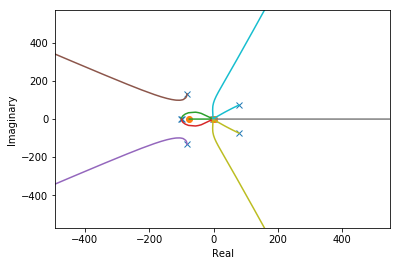

In [81]:
Abarc = A - B.dot(G) - K.dot(C)
sysD = control.StateSpace(Abarc, K, G, np.zeros((1, 1)))
tfD = control.ss2tf(sysD)
pprint('D(s) = {}'.format(tfD))
sysplant = control.StateSpace(A, B, C, np.zeros((1, 1)))
tfplant = control.ss2tf(sysplant)
pprint('H(s) = {}'.format(tfplant))

H = tfD*tfplant

gm, pm, _, _ = control.margin(H)
print('Gain margin (dB): {}'.format(control.mag2db(gm)))
print('Phase margin: {}'.format(pm))

control.root_locus(H, Plot=True, PrintGain=False)
#plt.axis([-10, 10, -10, 10])
plt.show()

##### Similarities to 8.7
* Compensators have similar form (3 zeros vs. 4 poles)

##### Differences to 8.7
* worse gain/phase margins
* greater freedom of placing observer poles
* qualitatively different pole/zero migration indicated by root locus plots

### Problem 8.9
#### a)
See Problem 4.4:

\begin{eqnarray}
A_{aa} &=& \begin{pmatrix}
-0.746 & 0.387 & 0 \\
0.024 & -0.0174 & 0 \\
0 & 0 & 0 \\
\end{pmatrix},
A_{au} = \begin{pmatrix}
-12.9 & 0 \\
4.31 & 0 \\
0 & 0 \\
\end{pmatrix}, \\
A_{ua} &=& \begin{pmatrix}
0.006 & 0.001 & 0 \\
-1 & 0 & 1 \\
\end{pmatrix},
A_{uu} = \begin{pmatrix}
-0.746 & 0.0369 \\
0 & 0 \\
\end{pmatrix},\\
B_{a} &=& \begin{pmatrix}
6.05 & 0.952 \\
-0.416 & -1.76 \\
0 & 0 \\
\end{pmatrix},\\
B_{u} &=& \begin{pmatrix}
0.0012 & 0.0092 \\
0 & 0 \\
\end{pmatrix}
\end{eqnarray}

#### b)

As I've said before, I am not doing any more block-diagrams.

#### c)

Condition 8.86 is $B_u - L C_a B_a = \mathbf{0}$.  $B_u$ is $2 \times 2$, while $C_a$ is $3 \times 3$ and $B_a$ is $3 \times 2$.  This means that $L$ must be $2 \times 3$ just by size requirements.  Let:
\begin{eqnarray}
L = \begin{pmatrix}
l_1 & l_2 & l_3 \\
l_4 & l_5 & l_6
\end{pmatrix},
\end{eqnarray}
and then see if is a way to satisfy Condition 8.86.

In [185]:
Ba = Matrix([[6.05, .952], [-.416, -1.76], [0, 0]])
Bu = Matrix([[.0012, .0092], [0, 0]])
Ca = eye(3)
l = symbols("l1:7")
L = Matrix([[l[0], l[1], l[2]], [l[3], l[4], l[5]]])
pprint(L*Ba)
pprint(' = ')
pprint(Bu)

⎡6.05⋅l₁ - 0.416⋅l₂  0.952⋅l₁ - 1.76⋅l₂⎤
⎢                                      ⎥
⎣6.05⋅l₄ - 0.416⋅l₅  0.952⋅l₄ - 1.76⋅l₅⎦
 = 
⎡0.0012  0.0092⎤
⎢              ⎥
⎣  0       0   ⎦


This is a linear system with $\mathbf{x} = [l_1 \ l_2 \ l_4 \ l_5]^T$.  

In [186]:
As = np.array([[6.05, -.416, 0, 0], [.952, 1.76, 0, 0], [0, 0, 6.05, -.416], [0, 0, 0.952, -1.76]]).astype('float').reshape((4, 4))
bs = np.array([[.0012], [.0092], [0], [0]]).astype('float').reshape((4, 1))
xs = np.linalg.solve(As, bs)
pprint('[[l1], [l2], [l4], [l5]]\' = ')
pprint(xs)

[[l1], [l2], [l4], [l5]]' = 
 [[ 0.00053777]
  [ 0.00493639]
  [ 0.        ]
 [-0.        ]]


The gain matrix $L$ can be made to meet Condition 8.86 when:
\begin{eqnarray}
L = \begin{pmatrix}
0.000538 & 0.00494 & l_3 \\
0 & 0 & l_6 \\
\end{pmatrix}
\end{eqnarray}

The parameters $l_3$ and $l_6$ can be chosen freely to meet other observer design objectives; e.g. pole-placement.

But what about the suitability of the pole-placement?  The observer poles are determined by the characteristic polynomial of $F$.

In [187]:
Auu = Matrix([[-0.746, 0.0369], [0, 0]])
Aau = Matrix([[-12.9, 0], [4.31, 0], [0, 0]])
L = Matrix([[5.37777e-4, 4.93639e-3, l[2]], [0, 0, l[5]]])
F = Auu - L*Aau
pprint(F)

⎡-0.7603385176  0.0369⎤
⎢                     ⎥
⎣      0          0   ⎦


Clearly, $F$ has a pole at $s=0$, so the closed-loop dynamics will not be asymptotically stable.  Because of this one pole, every pole is not at a desirable location.

#### d)
We have two free gains, $l_3$ and $l_6$.  The reduced-order observer will have two singular values, because it is order 2.  Therefore, we can place the remaining poles to cancel transmission zeros of the (unavailable) process.

### Problem 8.10

#### a)
We have a reduced order observer from Problem 7.5, and a control law from 6.9.  At this point, the methods of Problem 8.5 above can be used to find each compensator in terms of the gains $g_i$, $l_i$ for $i = 1, 2, 3 ,4$.  This would be kind of tedious, so I'm not going to do it.

#### b)
Block-diagram omitted.

### Problem 8.11
_Omitted because of bogus exogenous method_

### Problem 8.12
#### a)
Get $G$ from Problem 6.6.  The problem specifically calls out a fourth-order observer, so the reference $h_0$ and the airspeed $V$ are discarded in the subsequent treatment.

In [85]:
A = np.array([[-1, 1, 0, 0], [-5, -.5, 0, 0], [0, 1, 0, 0], [-1, 0, 1, 0]]).astype('float').reshape((4, 4))
B = np.array([[-.1], [-9], [0], [0]]).astype('float').reshape((4, 1))
C = np.array([[0., 0., 0., 1.]]).astype('float').reshape((1, 4))
D = np.zeros((1, 1))
closedLoopPoles = np.array(2.5*np.array([np.complex(-0.5, 0.5*np.sqrt(3.)), np.complex(-0.5, -0.5*np.sqrt(3.)),
                                         np.complex(-0.5*np.sqrt(3.), 0.5), np.complex(-0.5*np.sqrt(3.), -0.5)]))
desiredObsPoles = np.array([np.complex(-2., np.sqrt(3)*2.), np.complex(-2., -np.sqrt(3)*2.),
                      np.complex(-np.sqrt(3)*2., 2.), np.complex(-np.sqrt(3)*2., -2.)])
tfComp = ch8_utils.fullOrderCompensator(A, B, C, D, closedLoopPoles, desiredObsPoles)
print('D(s) = {}'.format(tfComp))
sysPlant = control.StateSpace(A, B, C, D)
tfPlant = control.ss2tf(sysPlant)
H = tfComp*tfPlant

D(s) = 
   -339.8 s^3 - 725.8 s^2 - 2096 s - 1176
--------------------------------------------
s^4 + 16.26 s^3 + 127.8 s^2 + 633.2 s + 1786



#### b)

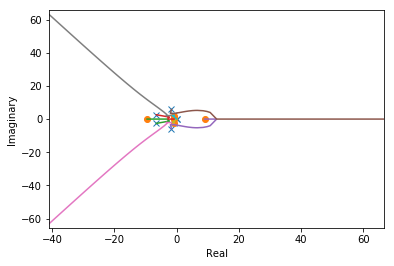

1.0 <= k <= 1.62 defines the range of stable gains.


In [86]:
control.root_locus(H, Plot=True, PrintGain=False)
plt.show()
k = np.linspace(1, 2, 101)
kStable = ch8_utils.stabilityRange(tfComp, tfPlant, k)
if kStable is not None:
    print('{min} <= k <= {max} defines the range of stable gains.'.format(min=kStable[0], max=kStable[1]))
else:
    print('no stable gains were found in the range provided')

### Problem 8.13
#### a)
We can reuse a lot from Problem 8.12.  However, the system needs to be rearranged so that $h$. which is measurable, is the first state.

In [91]:
A = np.array([[0, -1, 0, 1], [0, -1, 1, 0], [0, -5, -.5, 0], [0, 0, 1, 0]]).astype('float').reshape((4, 4))
B = np.array([[0], [-.1], [-9], [0]]).astype('float').reshape((4, 1))
C = np.array([[1, 0, 0, 0]]).astype('float').reshape((1, 4))
D = np.zeros((1, 1))
sysPlant = control.StateSpace(A, B, C, D)

### Controller ###
closedLoopPoles = np.array(2.5*np.array([np.complex(-0.5, 0.5*np.sqrt(3.)), np.complex(-0.5, -0.5*np.sqrt(3.)),
                                         np.complex(-0.5*np.sqrt(3.), 0.5), np.complex(-0.5*np.sqrt(3.), -0.5)]))
G = ch6_utils.bassGura(A, B, closedLoopPoles)

### Observer ###
desiredObsPoles = np.array([np.complex(-4., 0.), np.complex(-2.*np.sqrt(2), 2.*np.sqrt(2)),
                            np.complex(-2.*np.sqrt(2), -2.*np.sqrt(2))])
Aaa = np.array([A[0, 0]]).reshape((1, 1))
Aau = np.array(A[0, 1:]).reshape((1, 3))
Aua = np.array(A[1:, 0]).reshape((3, 1))
Auu = np.array(A[1:, 1:]).reshape((3, 3))
Ba = np.array([0]).reshape((1, 1))
Bu = np.array(B[1:]).reshape((3, 1))
Ca = np.array([[1]])
L, Gbb, H = ch7_utils.reducedOrderObserver(Aaa, Aau, Aua, Auu, Ba, Bu, Ca, desiredObsPoles)
F = Auu - L@Aau

### Compensator ###
G1 = np.array([G[0, 0]]).reshape((1, 1))
G2 = np.array(G[0, 1:]).reshape((1, 3))
Ar = F-H@G2
Br = Ar@L + Gbb - H@G1
Cr = G2
Dr = G1+G2@L
sysComp = control.StateSpace(Ar, Br, Cr, Dr)
tfComp = control.ss2tf(sysComp)
print('D(s) = {}'.format(tfComp))
tfPlant = control.ss2tf(sysPlant)
H = tfComp*tfPlant

D(s) = 
-81.66 s^3 - 178.9 s^2 - 500.7 s - 294.1
----------------------------------------
    s^3 + 14.99 s^2 + 108.1 s + 373.2

 [-2.82842712+2.82842712j -2.82842712-2.82842712j -4.        +0.j 
 -1.25      +2.16506351j -1.25      -2.16506351j -2.16506351+1.25j
                     -2.16506351-1.25j      ]                     


#### b)

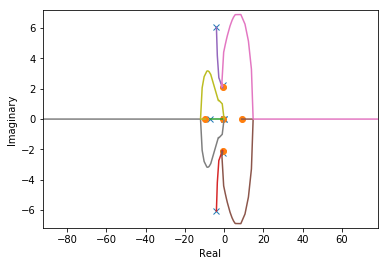

1.0 <= k <= 2.035 defines the range of stable gains.


In [92]:
control.root_locus(H, Plot=True, PrintGain=False)
plt.show()
# T(s) = 1 + Kb*D(s)*H(s) (Kb != K from above!)
k = np.linspace(1, 2.5, 101)
kStable = ch8_utils.stabilityRange(tfComp, tfPlant, k)
if kStable is not None:
    print('{min} <= k <= {max} defines the range of stable gains.'.format(min=kStable[0], max=kStable[1]))
else:
    print('no stable gains were found in the range provided')

The margins for the compensator with reduced-order observer is significantly better.  The root locus indicates some nice pole-zero cancellation (dots are very near x's near the line $y=0$ above).  There is the same number of poles as zeros in the reduced order observer case.  This compensator is lower order with better closed-loop stability properties.  This is pretty cool, I think.